# 01 - Business Understanding


Using Data Mining the aim is to idenity and predict the factors 
which affect the use of bike-sharing rental services 

# 02 -Data Exploration 

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/23 19:58:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.csv('train.csv')

df_pd = pd.read_csv('train.csv')

In [3]:
df.show()

df.columns 

+-------------------+------+-------+----------+-------+-----+------+--------+---------+------+----------+-----+
|                _c0|   _c1|    _c2|       _c3|    _c4|  _c5|   _c6|     _c7|      _c8|   _c9|      _c10| _c11|
+-------------------+------+-------+----------+-------+-----+------+--------+---------+------+----------+-----+
|           datetime|season|holiday|workingday|weather| temp| atemp|humidity|windspeed|casual|registered|count|
|2011-01-01 00:00:00|     1|      0|         0|      1| 9.84|14.395|      81|        0|     3|        13|   16|
|2011-01-01 01:00:00|     1|      0|         0|      1| 9.02|13.635|      80|        0|     8|        32|   40|
|2011-01-01 02:00:00|     1|      0|         0|      1| 9.02|13.635|      80|        0|     5|        27|   32|
|2011-01-01 03:00:00|     1|      0|         0|      1| 9.84|14.395|      75|        0|     3|        10|   13|
|2011-01-01 04:00:00|     1|      0|         0|      1| 9.84|14.395|      75|        0|     0|         1

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11']

In [4]:
# rename columns 
df = df.withColumnRenamed('_c0', 'datetime')
df = df.withColumnRenamed('_c1', 'season')
df = df.withColumnRenamed('_c2', 'holiday')
df = df.withColumnRenamed('_c3', 'workday')
df = df.withColumnRenamed('_c4', 'weather')
df = df.withColumnRenamed('_c5', 'temp')
df = df.withColumnRenamed('_c6', 'feels_temp')
df = df.withColumnRenamed('_c7', 'humidity')
df = df.withColumnRenamed('_c8', 'windspeed')
df = df.withColumnRenamed('_c9', 'casual')
df = df.withColumnRenamed('_c10', 'registered')
df = df.withColumnRenamed('_c11', 'count')

df.show()



+-------------------+------+-------+----------+-------+-----+----------+--------+---------+------+----------+-----+
|           datetime|season|holiday|   workday|weather| temp|feels_temp|humidity|windspeed|casual|registered|count|
+-------------------+------+-------+----------+-------+-----+----------+--------+---------+------+----------+-----+
|           datetime|season|holiday|workingday|weather| temp|     atemp|humidity|windspeed|casual|registered|count|
|2011-01-01 00:00:00|     1|      0|         0|      1| 9.84|    14.395|      81|        0|     3|        13|   16|
|2011-01-01 01:00:00|     1|      0|         0|      1| 9.02|    13.635|      80|        0|     8|        32|   40|
|2011-01-01 02:00:00|     1|      0|         0|      1| 9.02|    13.635|      80|        0|     5|        27|   32|
|2011-01-01 03:00:00|     1|      0|         0|      1| 9.84|    14.395|      75|        0|     3|        10|   13|
|2011-01-01 04:00:00|     1|      0|         0|      1| 9.84|    14.395|

In [5]:
#Filter out initial row as it is column lable 
df = df.filter(df.datetime!='datetime')

df.show()

df.columns

+-------------------+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+
|           datetime|season|holiday|workday|weather| temp|feels_temp|humidity|windspeed|casual|registered|count|
+-------------------+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+
|2011-01-01 00:00:00|     1|      0|      0|      1| 9.84|    14.395|      81|        0|     3|        13|   16|
|2011-01-01 01:00:00|     1|      0|      0|      1| 9.02|    13.635|      80|        0|     8|        32|   40|
|2011-01-01 02:00:00|     1|      0|      0|      1| 9.02|    13.635|      80|        0|     5|        27|   32|
|2011-01-01 03:00:00|     1|      0|      0|      1| 9.84|    14.395|      75|        0|     3|        10|   13|
|2011-01-01 04:00:00|     1|      0|      0|      1| 9.84|    14.395|      75|        0|     0|         1|    1|
|2011-01-01 05:00:00|     1|      0|      0|      2| 9.84|     12.88|      75|   6.0032|     0| 

['datetime',
 'season',
 'holiday',
 'workday',
 'weather',
 'temp',
 'feels_temp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [6]:
#Dataframe Components Summary 

df.select("datetime", "season", 'holiday', 'workday').summary().show()
df.select('weather',"temp", "feels_temp", 'humidity', 'windspeed').summary().show()
df.select("casual", "registered", 'count',).summary().show()

+-------+-------------------+------------------+-------------------+------------------+
|summary|           datetime|            season|            holiday|           workday|
+-------+-------------------+------------------+-------------------+------------------+
|  count|              10886|             10886|              10886|             10886|
|   mean|               null|2.5066139996325556|0.02856880396839978|0.6808745177291935|
| stddev|               null|1.1161743093443237|0.16659885062470944|0.4661591687997361|
|    min|2011-01-01 00:00:00|                 1|                  0|                 0|
|    25%|               null|               2.0|                0.0|               0.0|
|    50%|               null|               3.0|                0.0|               1.0|
|    75%|               null|               4.0|                0.0|               1.0|
|    max|2012-12-19 23:00:00|                 4|                  1|                 1|
+-------+-------------------+---

+-------+------------------+------------------+-----------------+------------------+------------------+
|summary|           weather|              temp|       feels_temp|          humidity|         windspeed|
+-------+------------------+------------------+-----------------+------------------+------------------+
|  count|             10886|             10886|            10886|             10886|             10886|
|   mean| 1.418427337865148|20.230859819952173|23.65508405291192| 61.88645967297446|12.799395406945093|
| stddev|0.6338385858190968| 7.791589843987573| 8.47460062648494|19.245033277394704|  8.16453732683871|
|    min|                 1|              0.82|             0.76|                 0|                 0|
|    25%|               1.0|             13.94|           16.665|              47.0|            7.0015|
|    50%|               1.0|              20.5|            24.24|              62.0|            12.998|
|    75%|               2.0|             26.24|            31.06

In [7]:
df.printSchema()

df_pd.info()


root
 |-- datetime: string (nullable = true)
 |-- season: string (nullable = true)
 |-- holiday: string (nullable = true)
 |-- workday: string (nullable = true)
 |-- weather: string (nullable = true)
 |-- temp: string (nullable = true)
 |-- feels_temp: string (nullable = true)
 |-- humidity: string (nullable = true)
 |-- windspeed: string (nullable = true)
 |-- casual: string (nullable = true)
 |-- registered: string (nullable = true)
 |-- count: string (nullable = true)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8  

In [8]:
#Check if there are any null or missing values
from pyspark.sql.functions import col

null_counts = df.select([col(column).isNull().alias(column) for column in df.columns]).toPandas().sum()
print("Null value counts in DataFrame:")
print(null_counts)

Null value counts in DataFrame:
datetime      0
season        0
holiday       0
workday       0
weather       0
temp          0
feels_temp    0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


+-------+------------------+
|summary|             count|
+-------+------------------+
|  count|             10886|
|   mean|191.57413191254824|
| stddev|181.14445383028493|
|    min|                 1|
|    25%|              42.0|
|    50%|             145.0|
|    75%|             284.0|
|    max|                99|
+-------+------------------+



<AxesSubplot:ylabel='Frequency'>

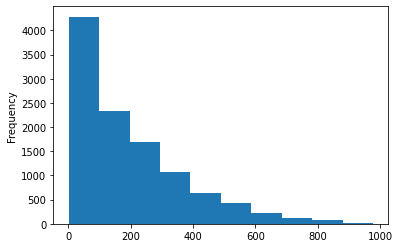

In [9]:
df.select('count',).summary().show()
df_pd['count'].plot.hist()

<AxesSubplot:ylabel='season'>

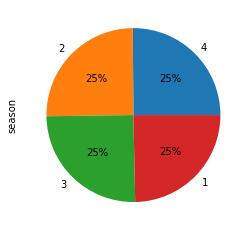

In [10]:
df_pd['season'].value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:ylabel='weather'>

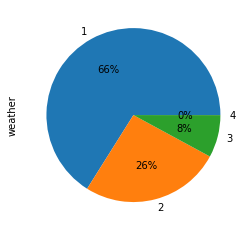

In [11]:
df_pd['weather'].value_counts().plot.pie(autopct='%1.0f%%')

# 03 - Data Preparation

In [12]:
# Import in the relevant types.
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)
df.show() 

+-------------------+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+
|           datetime|season|holiday|workday|weather| temp|feels_temp|humidity|windspeed|casual|registered|count|
+-------------------+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+
|2011-01-01 00:00:00|     1|      0|      0|      1| 9.84|    14.395|      81|        0|     3|        13|   16|
|2011-01-01 01:00:00|     1|      0|      0|      1| 9.02|    13.635|      80|        0|     8|        32|   40|
|2011-01-01 02:00:00|     1|      0|      0|      1| 9.02|    13.635|      80|        0|     5|        27|   32|
|2011-01-01 03:00:00|     1|      0|      0|      1| 9.84|    14.395|      75|        0|     3|        10|   13|
|2011-01-01 04:00:00|     1|      0|      0|      1| 9.84|    14.395|      75|        0|     0|         1|    1|
|2011-01-01 05:00:00|     1|      0|      0|      2| 9.84|     12.88|      75|   6.0032|     0| 

In [13]:
#Split datetime varaible into Year, Month, Day and Hour
from pyspark.sql.functions import split

split_col = split(df['datetime'], '-')

df = df.withColumn('Year', split_col.getItem(0))
df = df.withColumn('Month', split_col.getItem(1))
df = df.withColumn('Day_Time', split_col.getItem(2))


split_col = split(df['Day_Time'], '\s+')
df = df.withColumn('Day', split_col.getItem(0))
df = df.withColumn('Time', split_col.getItem(1))

split_col = split(df['Time'], ':')
df = df.withColumn('Hour', split_col.getItem(0))

df = df.drop('datetime')
df = df.drop('Day_Time')
df = df.drop('Time')
df.show() 


+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+----+-----+---+----+
|season|holiday|workday|weather| temp|feels_temp|humidity|windspeed|casual|registered|count|Year|Month|Day|Hour|
+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+----+-----+---+----+
|     1|      0|      0|      1| 9.84|    14.395|      81|        0|     3|        13|   16|2011|   01| 01|  00|
|     1|      0|      0|      1| 9.02|    13.635|      80|        0|     8|        32|   40|2011|   01| 01|  01|
|     1|      0|      0|      1| 9.02|    13.635|      80|        0|     5|        27|   32|2011|   01| 01|  02|
|     1|      0|      0|      1| 9.84|    14.395|      75|        0|     3|        10|   13|2011|   01| 01|  03|
|     1|      0|      0|      1| 9.84|    14.395|      75|        0|     0|         1|    1|2011|   01| 01|  04|
|     1|      0|      0|      2| 9.84|     12.88|      75|   6.0032|     0|         1|    1|2011

In [14]:
#Reformt Schema
from pyspark.sql.types import StringType, IntegerType, FloatType, BooleanType

df = df.withColumn("season" ,df["season"].cast(IntegerType()))
df = df.withColumn("holiday" ,df["holiday"].cast(BooleanType()))
df = df.withColumn("workday" ,df["workday"].cast(BooleanType()))
df = df.withColumn("weather" ,df["weather"].cast(IntegerType()))
df = df.withColumn("temp" ,df["temp"].cast(FloatType()))
df = df.withColumn("feels_temp" ,df["feels_temp"].cast(FloatType()))
df = df.withColumn("humidity" ,df["humidity"].cast(IntegerType()))
df = df.withColumn("windspeed" ,df["windspeed"].cast(FloatType()))
df = df.withColumn("casual" ,df["casual"].cast(IntegerType()))
df = df.withColumn("registered" ,df["registered"].cast(IntegerType()))
df = df.withColumn("count" ,df["count"].cast(IntegerType()))
df = df.withColumn("Year" ,df["Year"].cast(IntegerType()))
df = df.withColumn("Month" ,df["Month"].cast(IntegerType()))
df = df.withColumn("Day" ,df["Day"].cast(IntegerType()))
df = df.withColumn("Hour" ,df["Hour"].cast(IntegerType()))


df.printSchema()

root
 |-- season: integer (nullable = true)
 |-- holiday: boolean (nullable = true)
 |-- workday: boolean (nullable = true)
 |-- weather: integer (nullable = true)
 |-- temp: float (nullable = true)
 |-- feels_temp: float (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- windspeed: float (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Hour: integer (nullable = true)



In [15]:
df.show()

+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+----+-----+---+----+
|season|holiday|workday|weather| temp|feels_temp|humidity|windspeed|casual|registered|count|Year|Month|Day|Hour|
+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+----+-----+---+----+
|     1|  false|  false|      1| 9.84|    14.395|      81|      0.0|     3|        13|   16|2011|    1|  1|   0|
|     1|  false|  false|      1| 9.02|    13.635|      80|      0.0|     8|        32|   40|2011|    1|  1|   1|
|     1|  false|  false|      1| 9.02|    13.635|      80|      0.0|     5|        27|   32|2011|    1|  1|   2|
|     1|  false|  false|      1| 9.84|    14.395|      75|      0.0|     3|        10|   13|2011|    1|  1|   3|
|     1|  false|  false|      1| 9.84|    14.395|      75|      0.0|     0|         1|    1|2011|    1|  1|   4|
|     1|  false|  false|      2| 9.84|     12.88|      75|   6.0032|     0|         1|    1|2011

In [16]:
# Reformat Season and Weather Variables 
from pyspark.sql.functions import when

df_reformated = df.select("*") 

df_reformated = df_reformated.withColumn("season",
                   when(df_reformated["season"] == "1", "Spring")
                   .when(df_reformated["season"] == "2", "Summer")
                   .when(df_reformated["season"] == "3", "Autumn")
                   .when(df_reformated["season"] == "4", "Winter")
                   .otherwise(df_reformated["season"]))

df_reformated = df_reformated.withColumn("weather",
                   when(df_reformated["weather"] == "1", "Sunny")
                   .when(df_reformated["weather"] == "2", "Cloudy")
                   .when(df_reformated["weather"] == "3", "Lite R/S")
                   .when(df_reformated["weather"] == "4", "Severe Con")
                   .otherwise(df_reformated["weather"]))

df.show()
df_reformated.show()


+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+----+-----+---+----+
|season|holiday|workday|weather| temp|feels_temp|humidity|windspeed|casual|registered|count|Year|Month|Day|Hour|
+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+----+-----+---+----+
|     1|  false|  false|      1| 9.84|    14.395|      81|      0.0|     3|        13|   16|2011|    1|  1|   0|
|     1|  false|  false|      1| 9.02|    13.635|      80|      0.0|     8|        32|   40|2011|    1|  1|   1|
|     1|  false|  false|      1| 9.02|    13.635|      80|      0.0|     5|        27|   32|2011|    1|  1|   2|
|     1|  false|  false|      1| 9.84|    14.395|      75|      0.0|     3|        10|   13|2011|    1|  1|   3|
|     1|  false|  false|      1| 9.84|    14.395|      75|      0.0|     0|         1|    1|2011|    1|  1|   4|
|     1|  false|  false|      2| 9.84|     12.88|      75|   6.0032|     0|         1|    1|2011

In [17]:
df.select("season", "holiday", 'workday').summary().show()
df.select('weather',"temp", "feels_temp", 'humidity', 'windspeed').summary().show()
df.select("casual", "registered", 'count',).summary().show()
df.select("Year", "Month", 'Day','Hour').summary().show()

+-------+------------------+
|summary|            season|
+-------+------------------+
|  count|             10886|
|   mean|2.5066139996325556|
| stddev|1.1161743093443237|
|    min|                 1|
|    25%|                 2|
|    50%|                 3|
|    75%|                 4|
|    max|                 4|
+-------+------------------+

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|           weather|              temp|        feels_temp|          humidity|         windspeed|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|             10886|             10886|             10886|             10886|             10886|
|   mean| 1.418427337865148|20.230859755084463|23.655083944697644| 61.88645967297446|12.799395461085087|
| stddev|0.6338385858190968| 7.791589801596519| 8.474600557366823|19.245033277394704|  8.16453733646764|
|    min|            

In [18]:
#Data Preparation



# 04 - Data Transformation


Correlation Matrix:
season        0.163439
holiday      -0.005393
workday       0.011594
weather      -0.128655
temp          0.394454
feels_temp    0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Year          0.260403
Month         0.166862
Day           0.019826
Hour          0.400601
Name: count, dtype: float64


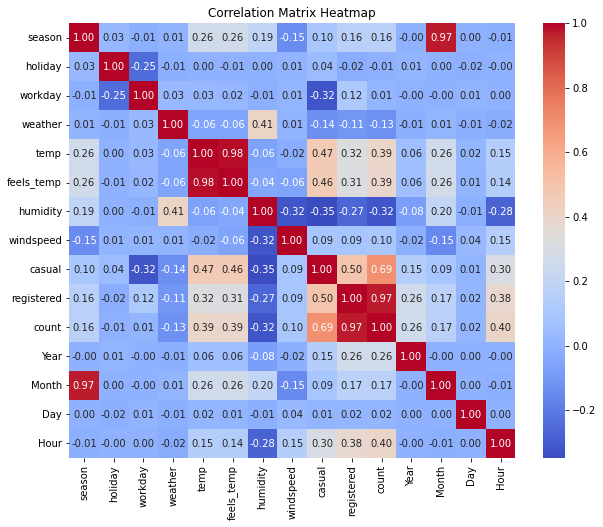

In [19]:
#Data Reduction
#Convert dataframe to Pandas to view correlation matirx
df_pd = df.toPandas()

correlation_matrix = df_pd.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix['count'])

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [20]:
#Drop Varaibles that are seen as to not have a high correlations with target variable "count"
df.show()

df = df.drop('holiday', 'workday', 'weather', 'humidity', 'Day')
df_reformated = df_reformated.drop('holiday', 'workday', 'weather', 'humidity', 'Day')

df.show()
df_reformated.show()


+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+----+-----+---+----+
|season|holiday|workday|weather| temp|feels_temp|humidity|windspeed|casual|registered|count|Year|Month|Day|Hour|
+------+-------+-------+-------+-----+----------+--------+---------+------+----------+-----+----+-----+---+----+
|     1|  false|  false|      1| 9.84|    14.395|      81|      0.0|     3|        13|   16|2011|    1|  1|   0|
|     1|  false|  false|      1| 9.02|    13.635|      80|      0.0|     8|        32|   40|2011|    1|  1|   1|
|     1|  false|  false|      1| 9.02|    13.635|      80|      0.0|     5|        27|   32|2011|    1|  1|   2|
|     1|  false|  false|      1| 9.84|    14.395|      75|      0.0|     3|        10|   13|2011|    1|  1|   3|
|     1|  false|  false|      1| 9.84|    14.395|      75|      0.0|     0|         1|    1|2011|    1|  1|   4|
|     1|  false|  false|      2| 9.84|     12.88|      75|   6.0032|     0|         1|    1|2011

# 05 - Data Mining Methods

### Classification Methods 
- Logistic regression

### Clustering Methods 
- K Means Clustering

### Regression Methods
- Linear Regression

#### Tree Methods
- Single Decision Tree
- Random Forest 
- Gradient Boosted ree Classifer 

# 06 - Data Mining Method Analysis


In [21]:
# K-Means Clustering 



# 07 - Data Mining


### K-MEANS CLUSTERING
#### PySpark

In [22]:
from pyspark.ml.clustering import KMeans
df.head(1)

df.printSchema()

root
 |-- season: integer (nullable = true)
 |-- temp: float (nullable = true)
 |-- feels_temp: float (nullable = true)
 |-- windspeed: float (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Hour: integer (nullable = true)



In [28]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType

df = df.withColumn("count", df["count"].cast(IntegerType()))

df.printSchema()

root
 |-- season: integer (nullable = true)
 |-- temp: float (nullable = true)
 |-- feels_temp: float (nullable = true)
 |-- windspeed: float (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Hour: integer (nullable = true)



#### Python

In [25]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans 
%matplotlib inline

### Linear Regression
#### PySpark

#### Python

# 08 - Interpretation
